# Parte 3

In [60]:
from keras.datasets import mnist
import numpy as np
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_val = x_train[55000:]
x_train = x_train[:55000]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = y_train[55000:]
y_train = y_train[:55000]

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [56]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size, bol):
    loss_train = list(); loss_test = list(); acc_train = list(); acc_test = list()
    for i in range(epochs):
        modelo.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=0, validation_data=(x_test, y_test))
        aux_train = modelo.evaluate(x_train, y_train, verbose=0)
        aux_test = modelo.evaluate(x_test, y_test, verbose=0)
        if bol==False:
            loss_train.append(aux_train)
            loss_test.append(aux_test)
        elif bol==True:
            acc_test.append(aux_test[1])
            acc_train.append(aux_train[1])
            loss_train.append(aux_train[0])
            loss_test.append(aux_test[0])
    if bol==False:            
        return(loss_train, loss_test)
    if bol==True:
        return(loss_train, loss_test, acc_train, acc_test)

def graficar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train, loss_test, acc_train, acc_test = retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size)
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, loss_train, '-', label='loss train')
    plt.plot(epl, loss_test, '-', label='loss test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs epoch')
    plt.show()
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, acc_train, '-', label='acc train')
    plt.plot(epl, acc_test, '-', label='acc test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs epoch')
    plt.show()
            
def subplot_loss(epochs, ns, distribucion, nombres, subs):
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[0], '-g')
        plt.plot(epl, aux[1], '-r')
        plt.grid()
    blue_line = mlines.Line2D([], [], color='g')
    reds_line = mlines.Line2D([], [], color='r')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Loss vs epoch', fontsize=16)
    plt.show()
    
def subplot_acc(epochs, ns, distribucion, nombres, subs):
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize=(9,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[2], '-y')
        plt.plot(epl, aux[3], '-b')
        plt.grid()
    blue_line = mlines.Line2D([], [], color='y')
    reds_line = mlines.Line2D([], [], color='b')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Accuracy vs epoch', fontsize=16)
    plt.show()

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

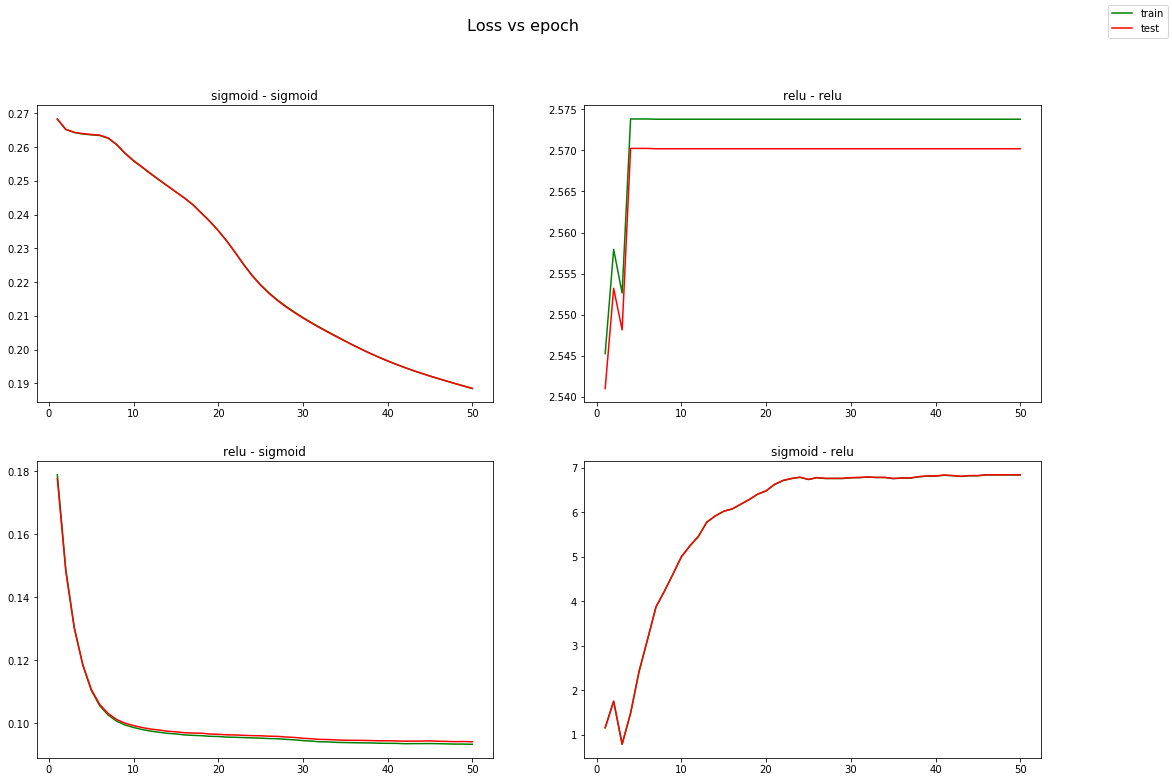

In [4]:
enc_lay = list(['sigmoid', 'relu', 'relu', 'sigmoid'])
dec_lay = list(['sigmoid', 'relu', 'sigmoid', 'relu'])
subs = list()
for i in range(4):
    input_img = Input(shape=(784,))
    encoded = Dense(32, activation=enc_lay[i])(input_img)
    decoded = Dense(784, activation=dec_lay[i])(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))

subplot_loss(50, 4, 221, ['sigmoid - sigmoid','relu - relu','relu - sigmoid','sigmoid - relu'], subs)

In [5]:
import pickle
#with open('T2.P3.aaa.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.aaa.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

In [36]:
import time
dimensiones = list([2,4,8,16,32,64])
subs = list()
for i in range(len(dimensiones)):
    start = time.time()
    input_img = Input(shape=(784,))
    encoded = Dense(dimensiones[i], activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(dimensiones[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    #autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
    subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))
    autoencoder.save('basic_autoencoder_768x'+str(dimensiones[i])+'.h5')
    stop = time.time()
    print('Tiempo con '+str(dimensiones[i])+' dimensiones: %.2f seg' %float(stop-start))

Tiempo con 2 dimensiones: 471.98 seg
Tiempo con 4 dimensiones: 416.15 seg
Tiempo con 8 dimensiones: 412.54 seg
Tiempo con 16 dimensiones: 414.79 seg
Tiempo con 32 dimensiones: 411.76 seg
Tiempo con 64 dimensiones: 416.02 seg


In [53]:
import pickle
#with open('T2.P3.a.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.a.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

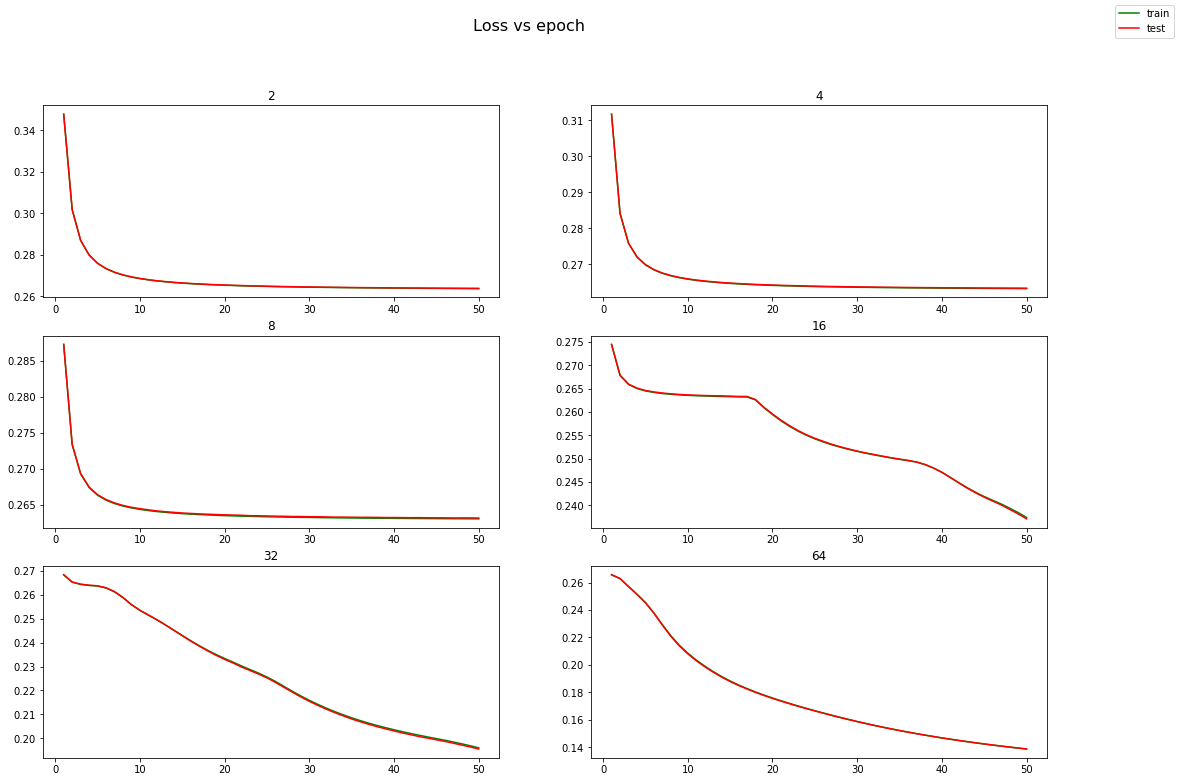

In [45]:
subplot_loss(50, 6, 321, ['2','4','8','16','32','64'], subs)

a) Primeramente se prueban las diferencias entre usar relu y sigmoide como función de activación, se puede ver en los gráficos para los casos como en los que se usa relu como activación del decoder produce peores resultados. Que relu tenga un peor comportamiento se debe a la construcción de esta y su tramo de valor cero en la función misma y su derivada, el valor cero de la imagen para valores negativos impide que el decoder pueda aprender de manera correcta ya que no se traspasan datos para aprender por lo mismo.
<br>
Luego en los gráficos de más abajo se compara el comportamiento de los autoencoder con un número diferente de dimensiones, se puede notar claramente que para las dimensiones más pequeñas y que por consiguiente presentan una mayor compresión de los datos se obtiene un peor valor de la función de perdida al cabo de 50 epochs, es decir, tienen un peor desempesño. Entonces se puede decir que le desempeño está directamente relacionado con la compresión y entre mayor es esta, menor será el desempeño del autoencoder.
<br>
Otro punto destacable es la cantidad de epochs que demora en alcanzar un valor para la función de perdida estable, para las dimensiones pequeñas se llega antes a un punto de convergencia que para las dimensiones más grandes.

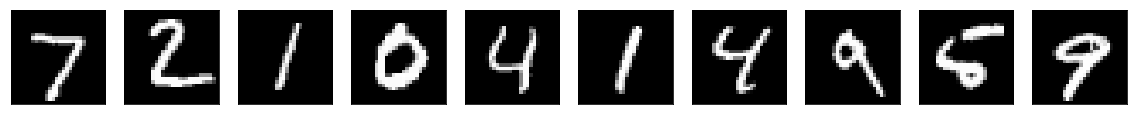

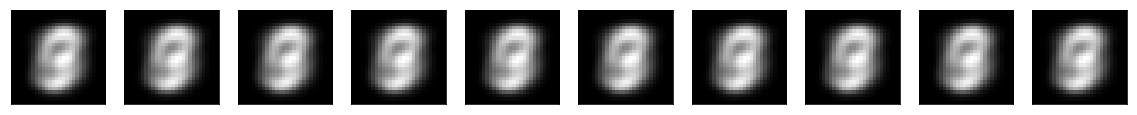

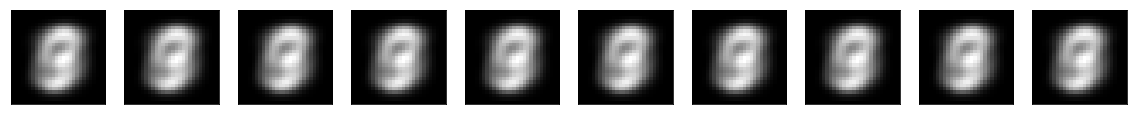

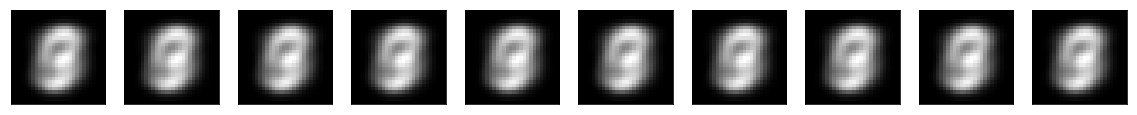

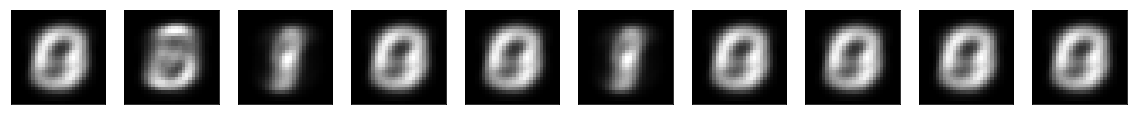

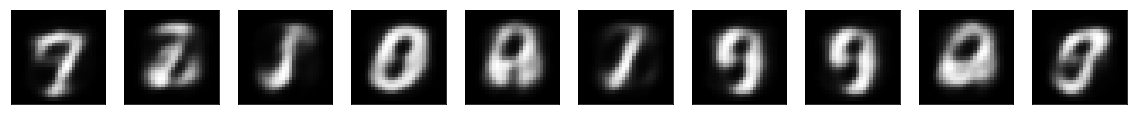

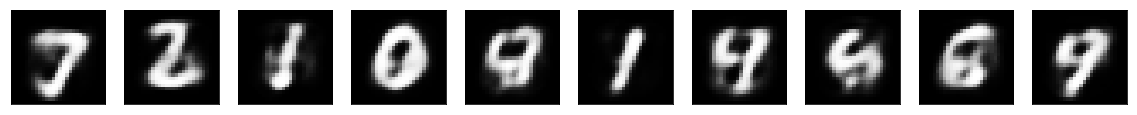

In [56]:
from keras.models import load_model

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

dimensiones = list([2,4,8,16,32,64])
for i in range(len(dimensiones)):
    autoencoder = load_model('basic_autoencoder_768x'+str(dimensiones[i])+'.h5')
    decoded_test = autoencoder.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

b) Una vez generadas las reconstrucciones para cada uno de los autoencoder creados anteriormente, se puede ver cualitativamente como mejora la percepción visual a medida que el número de dimensiones usado es mayor, esto se condice con el punto anterior en que se señalo que los valores para la función de perdid eran menores para los autoencoders con una dimensión mayor. Para los que se utilizo una dimensión menor a 32 se hace imposible distinguir un dígito de otro, mientras que para 32 y 64 sí, siendo el autencoder en que se usaron 64 dimensiones el que presenta un mejor resultado.

In [11]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
import time

componentes = list([2,4,8,16,32])
pca_train = list(); pca_test = list();
enc_train = list(); enc_test = list();

for c in componentes:
    print('Tiempo para %i componentes:' % c)
    #PCA
    start = time.time()
    pca = PCA(n_components=c)
    pca.fit(x_train)
    pca_train.append(pca.transform(x_train))
    pca_test.append(pca.transform(x_test))
    stop = time.time()
    print('PCA: %.2f seg' %float(stop-start))
    #AUTOENCODER
    start = time.time()
    autoencoder = load_model('basic_autoencoder_768x'+str(c)+'.h5')
    encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
    enc_train.append(encoder.predict(x_train))
    enc_test.append(encoder.predict(x_test))
    stop = time.time()
    print('ENC: %.2f seg' %float(stop-start))

Tiempo para 2 componentes:
PCA: 2.44 seg
ENC: 2.29 seg
Tiempo para 4 componentes:
PCA: 2.61 seg
ENC: 2.41 seg
Tiempo para 8 componentes:
PCA: 2.67 seg
ENC: 2.39 seg
Tiempo para 16 componentes:
PCA: 2.83 seg
ENC: 2.76 seg
Tiempo para 32 componentes:
PCA: 3.21 seg
ENC: 2.39 seg


In [13]:
for i in range(len(componentes)):
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train[i], y_train)
    print('Classification Accuracy PCA %.2f' % clf.score(pca_test[i],y_test))
    clf = KNeighborsClassifier(10)
    clf.fit(enc_train[i], y_train)
    print('Classification Accuracy ENCODE %.2f' % clf.score(enc_test[i],y_test))

Classification Accuracy PCA 0.13
Classification Accuracy ENCODE 0.00
Classification Accuracy PCA 0.15
Classification Accuracy ENCODE 0.00
Classification Accuracy PCA 0.35
Classification Accuracy ENCODE 0.00
Classification Accuracy PCA 0.46
Classification Accuracy ENCODE 0.30
Classification Accuracy PCA 0.59
Classification Accuracy ENCODE 0.44


c) En cuanto al tiempo que se demora PCA y el encoder, no se puede decir mucho ya que son similares. Por otro lado los valores de la exactitud al momento de realizar predicciones son mejores con PCA en todos los casos.

In [5]:
import time
dimensiones = list([2,4,8,16,32,64])
subs = list()
for i in range(len(dimensiones)):
    start = time.time()
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(dimensiones[i], activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(encoded3)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(inputs=input_img, outputs=decoded1)
    encoder = Model(inputs=input_img, outputs=encoded3)
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))
    autoencoder.save('my_autoencoder_768x1000x500x250x'+str(dimensiones[i])+'.h5')
    stop = time.time()
    print('Tiempo con '+str(dimensiones[i])+' dimensiones: %.2f seg' %float(stop-start))

Tiempo con 2 dimensiones: 833.63 seg
Tiempo con 4 dimensiones: 857.63 seg
Tiempo con 8 dimensiones: 867.87 seg
Tiempo con 16 dimensiones: 871.07 seg
Tiempo con 32 dimensiones: 872.66 seg
Tiempo con 64 dimensiones: 873.81 seg


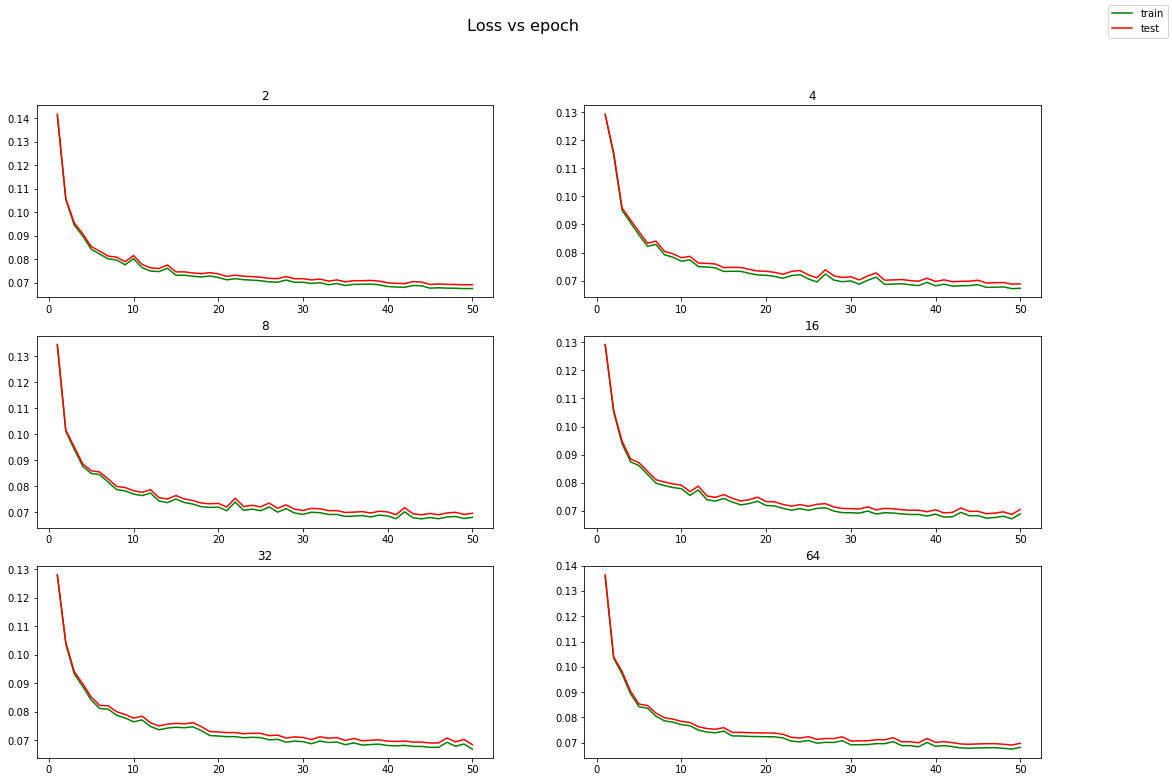

In [6]:
subplot_loss(50, 6, 321, ['2','4','8','16','32','64'], subs)

In [7]:
import pickle
#with open('T2.P3.d.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.a.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

In [3]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
import time

componentes = list([2,4,8,16,32,64])
pca_train = list(); pca_test = list();
enc_train = list(); enc_test = list();

for c in componentes:
    print('Tiempo para %i componentes:' % c)
    #PCA
    start = time.time()
    pca = PCA(n_components=c)
    pca.fit(x_train)
    pca_train.append(pca.transform(x_train))
    pca_test.append(pca.transform(x_test))
    stop = time.time()
    print('PCA: %.2f seg' %float(stop-start))
    #AUTOENCODER
    start = time.time()
    autoencoder = load_model('my_autoencoder_768x1000x500x250x'+str(c)+'.h5')
    encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
    enc_train.append(encoder.predict(x_train))
    enc_test.append(encoder.predict(x_test))
    stop = time.time()
    print('ENC: %.2f seg' %float(stop-start))

Tiempo para 2 componentes:
PCA: 2.42 seg
ENC: 3.92 seg


In [ ]:
for i in range(len(componentes)):
    print('%i componenetes:' %componentes[i])
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train[i], y_train)
    print('Classification Accuracy PCA %.2f' % clf.score(pca_test[i],y_test))
    clf = KNeighborsClassifier(10)
    clf.fit(enc_train[i], y_train)
    print('Classification Accuracy ENCODE %.2f' % clf.score(enc_test[i],y_test))

d) No fue posible hacer el entrenamiento para el clasificador con los modelos profundos. Sin embargo si fue posible ver que cada uno de los modelos profundos es mejor que los simples con los que se trabajo anteriormente. Cada uno de los modelos profundos llega a un valor para la función de perdida cercano a 0.07, lo que mejora al mejor modelo simple con 64 dimensiones y que tuvo un valor de 0.14.

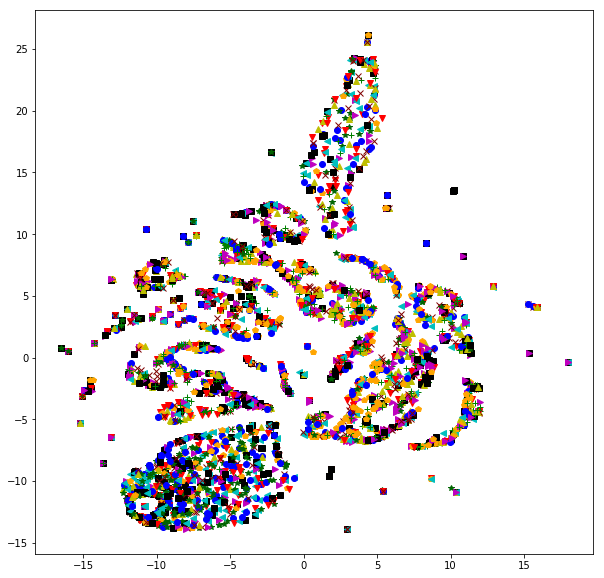

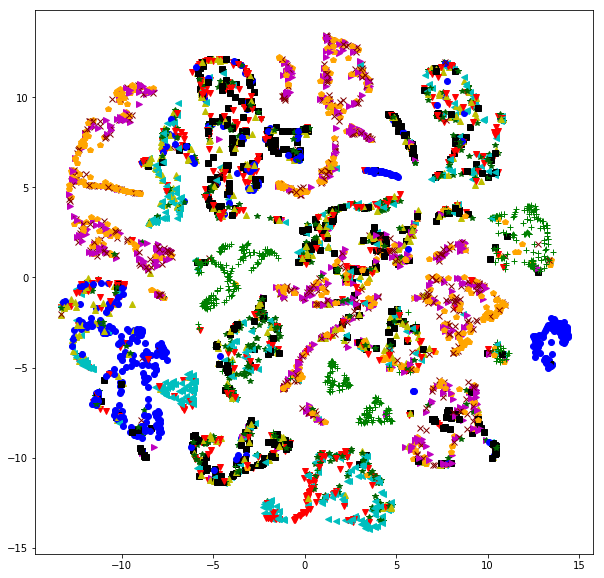

In [12]:
from keras.models import load_model
from sklearn.decomposition import PCA
autoencoder = load_model('basic_autoencoder_768x2.h5')
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
nplot=5000 #warning: mind your memory!
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = np.argmax(y_train[idx])
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1], color=colors[label], marker=markers[label], markersize=6)
plt.show()
pca = PCA(n_components=2)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
for idx in range(0,nplot):
    label = np.argmax(y_train[idx])
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1], color=colors[label], marker=markers[label], markersize=6)
plt.show()

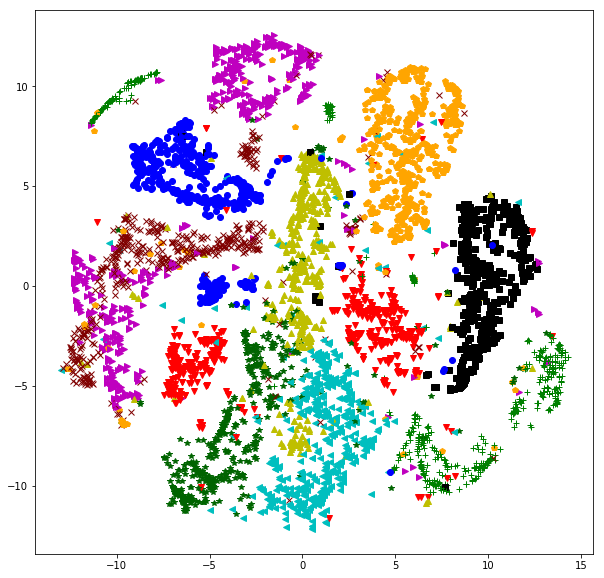

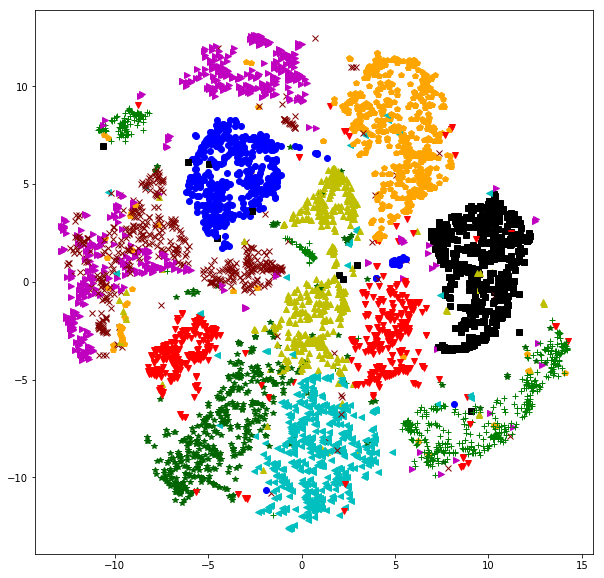

In [13]:
autoencoder = load_model('basic_autoencoder_768x64.h5')
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
nplot=5000 #warning: mind your memory!
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = np.argmax(y_train[idx])
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1], color=colors[label], marker=markers[label], markersize=6)
plt.show()
pca = PCA(n_components=64)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
for idx in range(0,nplot):
    label = np.argmax(y_train[idx])
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1], color=colors[label], marker=markers[label], markersize=6)
plt.show()

e) Se utiliza los modelos de una capa oculta. Primeramente se compara PCA y encoder para 2 y 64 dimensiones, siendo los resultados tal como se vieron en c). Cualitativamente se puede ver que para 2 dimensiones al encoder se le hace imposible diferenciar los dígitos en el espacio, mientras que PCA logra separar algunos grupos. Cuando se visualiza el resultado para 64 dimensiones se puede ver como en ambas instancias se logra una clara diferenciación de los dígitos entre sí.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_50 (UpSampling (None, 14, 14, 8)         0         
__________

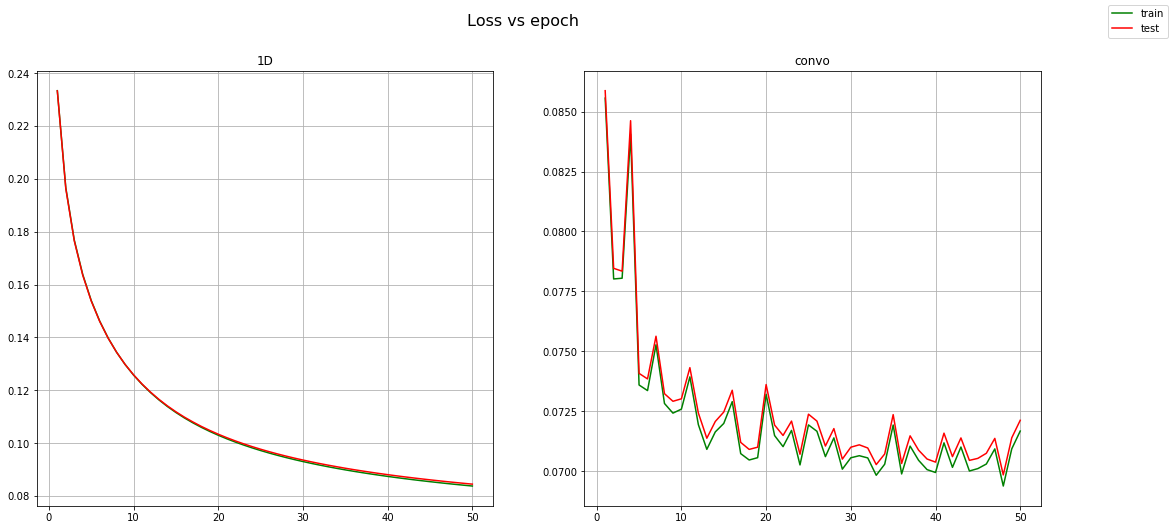

In [58]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,UpSampling2D

subs = list()

input_img = Input(shape=(784,))
encoded = Dense(392, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
encoder = Model(inputs=input_img, outputs=encoded)
encoded_input = Input(shape=(392,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))
autoencoder.save('basic_autoencoder_768x392.h5')

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(x_test, (-1, 28, 28, 1))
x_val = x_train[50000:]
x_train = x_train[:50000]
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()
subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))

subplot_loss(50, 2, 121, ['1D','convo'], subs)

In [49]:
import pickle
#with open('T2.P3.f.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.aaa.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

In [61]:
from numpy.random import binomial
noise_level = 0.1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

In [62]:
import time
dimensiones = list([8,16,32,64])
subs = list()
for i in range(len(dimensiones)):
    start = time.time()
    input_img = Input(shape=(784,))
    encoded = Dense(dimensiones[i], activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(dimensiones[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    subs.append(retornar(autoencoder, noisy_x_train, x_train, noisy_x_val, x_val, 50, 32, False))
    autoencoder.save('noisy_basic_autoencoder_768x'+str(dimensiones[i])+'.h5')
    stop = time.time()
    print('Tiempo con '+str(dimensiones[i])+' dimensiones: %.2f seg' %float(stop-start))

Tiempo con 8 dimensiones: 564.84 seg
Tiempo con 16 dimensiones: 534.60 seg
Tiempo con 32 dimensiones: 540.79 seg
Tiempo con 64 dimensiones: 558.82 seg


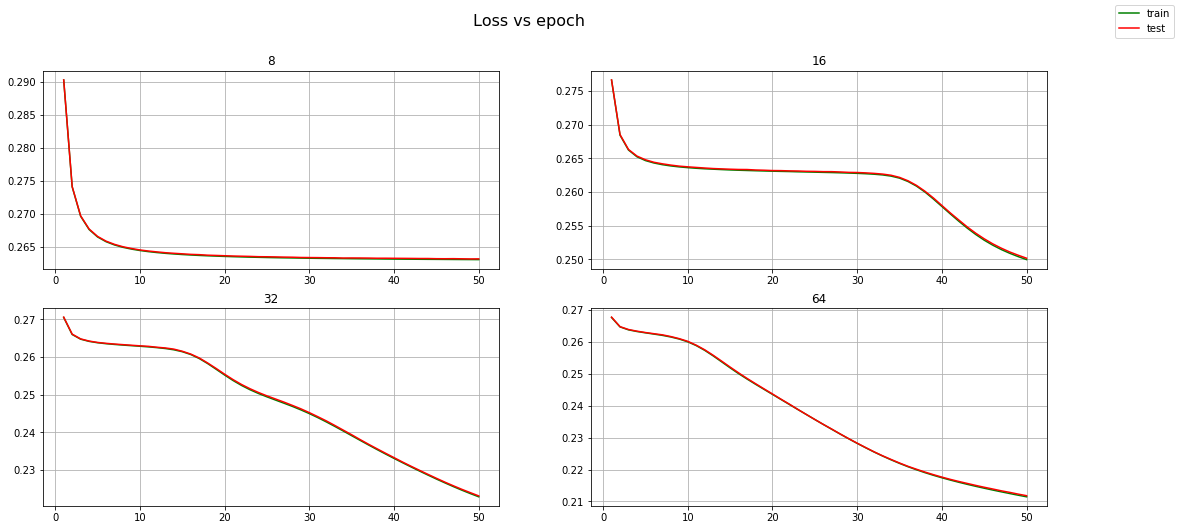

In [65]:
subplot_loss(50, 4, 221, ['8','16','32','64'], subs)

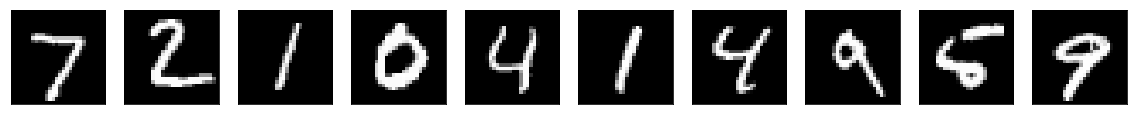

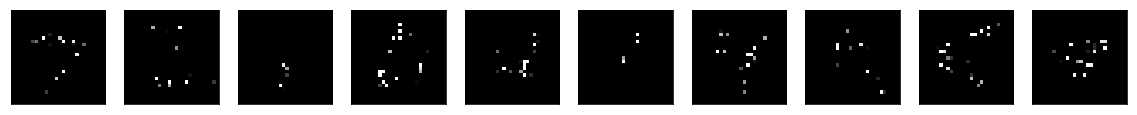

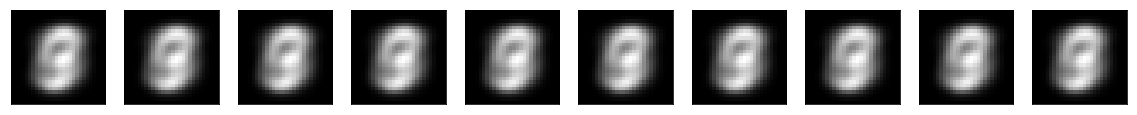

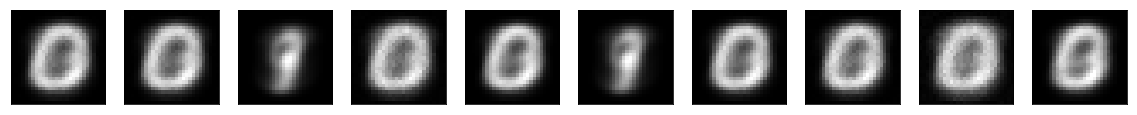

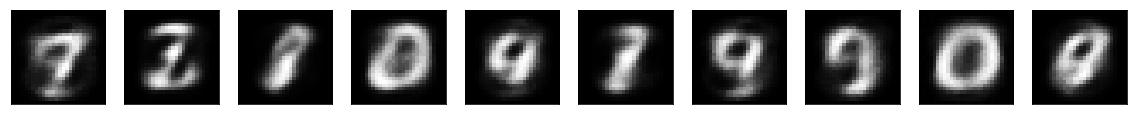

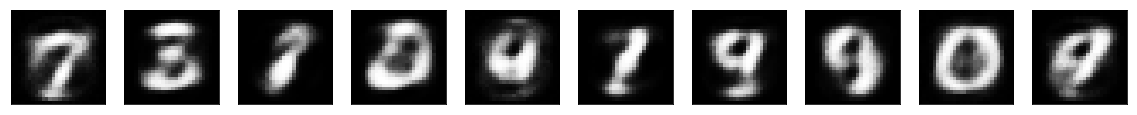

In [79]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()
        
plt.figure(figsize=(20, 4))        
for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(noisy_x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()
        
dimensiones = list([8,16,32,64])
for i in range(len(dimensiones)):
    autoencoder = load_model('noisy_basic_autoencoder_768x'+str(dimensiones[i])+'.h5')
    decoded_test = autoencoder.predict(noisy_x_test)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

b) Se repite los mismos pasos anteriores pero ahora con el set de datos con ruido, tal como se vio antes, a mayor dimensionalidad se obtienen mejores resultados. Para la última representación de imagenes que corresponde a 64 dimeniones se puede ver cualitativamente como el autoencoder es capaz de generar una representación cercana a la esperada a partir de una imagen con ruido.

In [63]:
import pickle
#with open('T2.P3.2.a.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.aaa.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

In [82]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model

autoencoder = load_model('noisy_basic_autoencoder_768x64.h5')
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
enc_train = encoder.predict(x_train)
enc_test = encoder.predict(x_test)
clf = KNeighborsClassifier(10)
clf.fit(enc_train, y_train)
print('Classification Accuracy ENCODE %.2f' % clf.score(enc_test,y_test))

Classification Accuracy ENCODE 0.83


In [86]:
print(enc_train.shape)

(55000, 64)


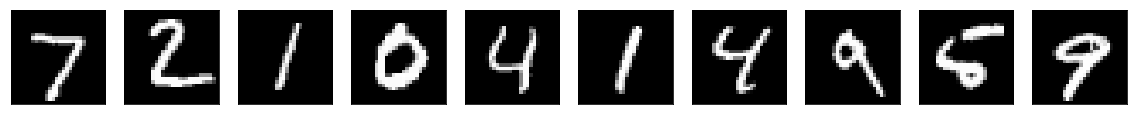

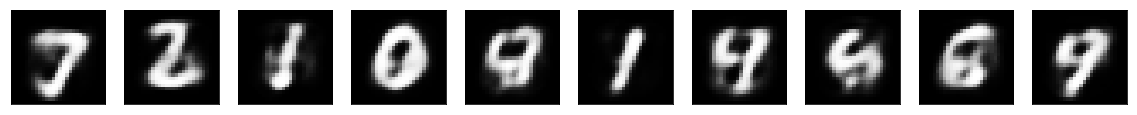

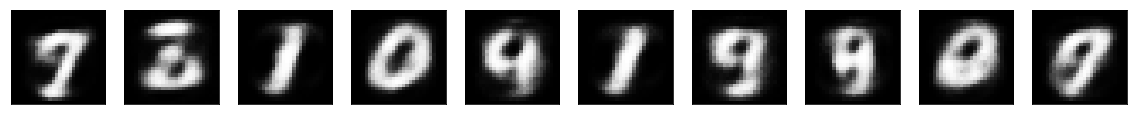

In [84]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()
        
        
dimensiones = list(['basic_autoencoder_768x64.h5', 'noisy_basic_autoencoder_768x64.h5'])
for i in range(len(dimensiones)):
    autoencoder = load_model(dimensiones[i])
    decoded_test = autoencoder.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

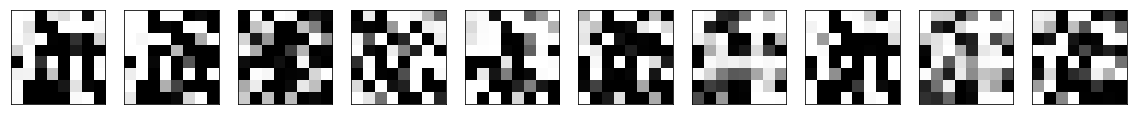

In [87]:
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(enc_train[i].reshape(8, 8),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

c) En esta parte se utilizo directamente uno de los autoencoders entrenados con las imagenes con ruido, específicamente se hizo con el básico de una capa de 64 dimensiones. Con este modelo se obtuvo para el set de pruebas un resultado del 83% de accuracy al clasificar imagenes comprimidas, este resultado es mejor que el obtenido para pca con 64 componentes (59%) y que un encoder de 64 dimensiones entrenado con imagenes sin ruido (44%).